In [1]:
import datarobot as dr

In [4]:
!uv pip install scikit-learn

Resolved 5 packages in 163ms                                                 
Installed 3 packages in 142ms                                       
 + scikit-learn==1.4.2
 + scipy==1.13.0
 + threadpoolctl==3.5.0


In [2]:
from x_flow.pipelines.measure.nodes import get_training_predictions, calculate_custom_metric
from x_flow.metrics.generalized_auc import generalized_f1


In [4]:
df = catalog.load("experiment.backtests_grouped")

[05/04/24 16:50:36] INFO     Loading data from experiment.backtests_grouped                     ]8;id=880468;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=663720;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\
                             (PartitionedDataset)...                                                               

In [7]:
import pandas as pd

In [11]:
df = pd.DataFrame([k.split("/") for k in catalog.load("experiment.backtests_grouped").keys()])
df.columns = ["project_id", "partition", "model_id", "data_subset_name"]

df["load_function"] = catalog.load("experiment.backtests_grouped").values()

def load_and_index(row):
    # Load the data from the function stored in the row
    loaded_df = row['load_function']()  # Assumption: this function returns a DataFrame
    
    # Create a DataFrame with repeated rows of index data for each entry in the loaded DataFrame
    index_data = pd.DataFrame([row.drop('load_function')] * len(loaded_df), columns=row.index.drop('load_function'))
    
    # Concatenate the index data with the loaded DataFrame
    combined_df = pd.concat([index_data.reset_index(drop=True), loaded_df.reset_index(drop=True)], axis=1)
    
    return combined_df

# Apply the function to each row and concatenate the results into one DataFrame
result_df = pd.concat(df.apply(load_and_index, axis=1).tolist(), ignore_index=True)

[05/04/24 16:53:27] INFO     Loading data from experiment.backtests_grouped                     ]8;id=299085;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=580801;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\
                             (PartitionedDataset)...                                                               

                    INFO     Loading data from experiment.backtests_grouped                     ]8;id=852601;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=822735;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\
                             (PartitionedDataset)...                                                               

In [12]:
result_df

,project_id,partition,model_id,data_subset_name,Unnamed: 0,request_id,date,cusip,BidAsk,Mid,...,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won,partition_id,prediction,timestamp
0,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,0.0,2,1779,05/09/2018,D206585A,0.02800,100.987000,...,135,61.915247,2.130334,2.954119,20139.904900,9,False,0.0,105.671984,2019-05-31T00:00:00.000000Z
1,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,0.0,22,1799,01/11/2017,D206582G,0.02890,107.410150,...,1339,682.341688,3.126781,2.582352,185724.770200,13,True,0.0,105.620357,2019-06-27T00:00:00.000000Z
2,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,0.0,25,1802,11/01/2019,D2R8H4BP,0.02459,100.348705,...,704,258.301236,2.847573,2.322971,82063.768970,6,True,0.0,113.203194,2019-07-12T00:00:00.000000Z
3,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,0.0,38,1815,30/11/2017,D206592F,0.14400,132.142400,...,328,109.404449,2.515874,10.515570,228010.800500,10,False,0.0,116.430669,2019-07-23T00:00:00.000000Z
4,6632cbcc2fb992e99d9db34f,A,6632cc12c9ce4f0234c37f85,0.0,82,1859,13/06/2018,D20659Y9,0.10100,107.585370,...,270,150.097567,2.431364,11.385454,165440.238300,10,False,0.0,110.230708,2019-06-26T00:00:00.000000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,4.0,1719,3517,25/07/2018,D2R8H4CU,0.14840,105.518400,...,26,14.453840,1.414973,16.171998,22199.362740,8,False,4.0,106.100189,2018-09-07T00:00:00.000000Z
5001,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,4.0,1785,3585,29/05/2018,D2R8H4CU,0.18760,106.118400,...,60,33.355015,1.778151,17.205245,54822.208230,15,False,4.0,99.884087,2018-09-13T00:00:00.000000Z
5002,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,4.0,1875,3675,22/12/2017,D2R06JAC,0.28660,110.501800,...,35,19.695829,1.544068,31.280828,60568.731790,11,False,4.0,101.619827,2018-08-21T00:00:00.000000Z
5003,6632cbcc2fb992e99d9db34f,E,6632cc0ff198af212e568824,4.0,1890,3690,01/07/2019,D20658UR,0.09080,174.434600,...,67,30.728308,1.826075,6.668298,38976.734220,14,False,4.0,149.538696,2018-09-25T00:00:00.000000Z


In [15]:
import pickle
projects = pickle.load(open('../all_output.pickle', 'rb'))

In [16]:
projects


[
    {
        'experiment_name': 'simple',
        'project_id': {
            'experiment.external_holdout': {
                '6632223051c8c4a13ff600bb/6632227831e74ebdd5f2b311/external_holdout': <bound method AbstractVersionedDataset.load of <kedro_datasets.pandas.csv_dataset.CSVDataset object at 0x7f7a9c17dcc0>>,
                '6632223051c8c4a13ff600bb/6632227831e74ebdd5f2b312/external_holdout': <bound method AbstractVersionedDataset.load of <kedro_datasets.pandas.csv_dataset.CSVDataset object at 0x7f7a9c17d7e0>>,
                '6632223051c8c4a13ff600bb/6632227831e74ebdd5f2b313/external_holdout': <bound method AbstractVersionedDataset.load of <kedro_datasets.pandas.csv_dataset.CSVDataset object at 0x7f7a9c17ded0>>,
                '6632223051c8c4a13ff600bb/6632227831e74ebdd5f2b314/external_holdout': <bound method AbstractVersionedDataset.load of <kedro_datasets.pandas.csv_dataset.CSVDataset object at 0x7f7a97b39cf0>>,
                '6632223051c8c4a13ff600bb/6632227831e74eb

In [4]:
project = projects[0]

In [2]:
df = catalog.load("raw_data_test")

[05/01/24 13:18:17] INFO     Loading data from raw_data_test (CSVDataset)...                    ]8;id=148757;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=587075;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

In [68]:
df.head()

,request_id,date,cusip,BidAsk,Mid,yield_to_maturity,years_to_maturity,years_since_issue,is_bench_02y,is_bench_05y,...,tier,salesperson,salesperson_num_ac_covered,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won
0,1777,04/01/2018,D2R8H4AK,0.0227,102.16795,-0.522589,3.263585,2.507923,False,False,...,C,Meghan,41,29,14.000329,1.462398,2.719329,4028.957313,10,True
1,1778,06/03/2018,D20658Z9,0.1442,128.70330,1.284039,29.005387,4.016510,False,False,...,C,Meghan,41,208,68.139531,2.318063,12.510871,167553.610200,8,False
2,1779,05/09/2018,D206585A,0.0280,100.98700,-0.607714,2.661246,3.616775,False,False,...,A,Kate,9,135,61.915247,2.130334,2.954119,20139.904900,9,False
3,1780,14/08/2019,D2R8H4DM,0.0230,109.05650,-0.721392,9.566247,1.086949,False,False,...,C,William,15,99,43.242394,1.995635,2.661497,14369.066680,11,False
4,1781,25/04/2018,D20659WR,0.0242,106.53110,-0.492709,1.957604,7.685305,True,False,...,B,Louis,3,228,130.709965,2.357935,2.299022,27923.751130,9,False


In [70]:
import pandas as pd

In [73]:
!uv pip install matplotlib

Resolved 11 packages in 262ms                                                
Downloaded 7 packages in 2.95s.4                                    
Installed 7 packages in 22ms.8.4                                    
 + contourpy==1.2.1
 + cycler==0.12.1
 + fonttools==4.51.0
 + kiwisolver==1.4.5
 + matplotlib==3.8.4
 + pillow==10.3.0
 + pyparsing==3.1.2


<Axes: >

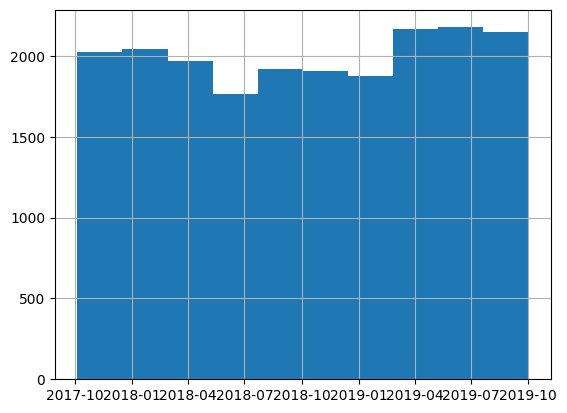

In [74]:
pd.to_datetime(df["date"], dayfirst=True).hist()

In [75]:
pd.to_datetime(df["date"], dayfirst=True).quantile(.8)

Timestamp('2019-05-20 00:00:00')

In [77]:
training_data = df[df["date"]<='2019-05-20 00:00:00']

,request_id,date,cusip,BidAsk,Mid,yield_to_maturity,years_to_maturity,years_since_issue,is_bench_02y,is_bench_05y,...,tier,salesperson,salesperson_num_ac_covered,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won
0,1777,04/01/2018,D2R8H4AK,0.02270,102.16795,-0.522589,3.263585,2.507923,False,False,...,C,Meghan,41,29,14.000329,1.462398,2.719329,4028.957313,10,True
1,1778,06/03/2018,D20658Z9,0.14420,128.70330,1.284039,29.005387,4.016510,False,False,...,C,Meghan,41,208,68.139531,2.318063,12.510871,167553.610200,8,False
2,1779,05/09/2018,D206585A,0.02800,100.98700,-0.607714,2.661246,3.616775,False,False,...,A,Kate,9,135,61.915247,2.130334,2.954119,20139.904900,9,False
3,1780,14/08/2019,D2R8H4DM,0.02300,109.05650,-0.721392,9.566247,1.086949,False,False,...,C,William,15,99,43.242394,1.995635,2.661497,14369.066680,11,False
6,1783,02/10/2018,D2R8H4CM,0.02500,101.20850,-0.299065,3.770098,1.237534,False,False,...,B,Louis,3,485,261.689713,2.685742,2.008607,49303.459460,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21995,08/11/2018,D206592F,0.09472,133.38616,1.012468,25.413253,6.532646,False,False,...,E,George,30,27,9.005854,1.431364,8.771605,15800.752970,14,False
19996,21996,15/11/2017,D20658Z9,0.16100,131.28450,1.202083,29.309295,3.712602,False,False,...,A,Philip,8,1070,350.525470,3.029384,10.013369,703742.357800,10,False
19997,21997,12/12/2018,D2R8H4DE,0.02220,101.48490,-0.339575,5.147265,0.856965,False,False,...,A,Kate,9,916,525.133017,2.961895,1.731113,80471.099390,18,True
19998,21998,14/05/2019,D2R8H4DZ,0.01900,101.18050,-0.641022,2.557205,0.205343,False,False,...,C,Meghan,41,306,215.909578,2.485721,1.669915,25853.739300,14,False


In [78]:
testing_data = df[df["date"]>'2019-05-20 00:00:00']

In [79]:
training_data.to_csv("../include/x_flow/raw_data/DR_Demo_Bond_trading_RFQ_train.csv")
testing_data.to_csv("../include/x_flow/raw_data/DR_Demo_Bond_trading_RFQ_test.csv")


In [19]:
training_data = catalog.load("raw_data_train")

[05/01/24 22:42:49] INFO     Loading data from raw_data_train (CSVDataset)...                   ]8;id=677561;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=375943;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

In [20]:
training_data.nunique()


Unnamed: 0                    20000
request_id                    20000
date                            500
cusip                            65
BidAsk                         3175
Mid                           11749
yield_to_maturity             12016
years_to_maturity              5980
years_since_issue              4228
is_bench_02y                      2
is_bench_05y                      2
is_bench_10y                      2
is_bench_30y                      2
IssueName                        65
AmountOut                        31
issue_date                       59
Coupon                           19
Currency                          1
maturity_date                    59
counterparty_id                 261
counterparty_type                 3
name                            261
counterparty_aum                261
ann_account_value_bln           261
tier                              5
salesperson                      16
salesperson_num_ac_covered       13
notional_EURm              

In [26]:
training_data.groupby("Coupon").count()

,Unnamed: 0,request_id,date,cusip,BidAsk,Mid,yield_to_maturity,years_to_maturity,years_since_issue,is_bench_02y,...,tier,salesperson,salesperson_num_ac_covered,notional_EURm,notional_bps_total_issue,log_notional,resp_bidAsk_norm,response_revenue_EUR,num_brokers,trade_won
Coupon,,,,,,,,,,,,,,,,,,,,,
0.000,5093,5093,5093,5093,5093,5093,5075,5093,4407,5093,...,5093,5093,5093,5093,5093,5093,5093,5093,5093,5093
0.100,653,653,653,653,653,653,653,653,653,653,...,653,653,653,653,653,653,653,653,653,653
0.250,1909,1909,1909,1909,1909,1909,1909,1909,1909,1909,...,1909,1909,1909,1909,1909,1909,1909,1909,1909,1909
0.500,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962,...,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962
1.000,650,650,650,650,650,650,650,650,650,650,...,650,650,650,650,650,650,650,650,650,650
1.250,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,...,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
1.500,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,...,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
1.750,970,970,970,970,970,970,970,970,970,970,...,970,970,970,970,970,970,970,970,970,970
2.000,638,638,638,638,638,638,638,638,638,638,...,638,638,638,638,638,638,638,638,638,638


In [24]:
projects[0]


{
    'experiment_name': 'simple',
    'project_id': '663185947084cca26b461a39',
    'experiment_config': {
        'experiment_name': 'simple',
        'analyze_and_model': {'target': 'Mid', 'mode': 'quick', 'worker_count': -1, 'metric': None},
        'binarize_data': {'binarize_operator': None, 'binarize_threshold': None},
        'advanced_options': {'shap_only_mode': True},
        'datetime_partitioning': {'datetime_partition_column': 'date', 'number_of_backtests': 5}
    }
}

In [25]:
projects[4]


{
    'experiment_name': 'binarize_150',
    'project_id': '6631859ac6db171b5ef6046e',
    'experiment_config': {
        'experiment_name': 'binarize_150',
        'analyze_and_model': {'target': 'Mid', 'mode': 'auto', 'worker_count': -1, 'metric': None},
        'binarize_data': {'binarize_operator': '>', 'binarize_threshold': 150.0},
        'advanced_options': {'shap_only_mode': None},
        'datetime_partitioning': {'datetime_partition_column': 'date', 'number_of_backtests': 5}
    }
}

In [26]:
project = projects[0]

In [27]:
project


{
    'experiment_name': 'simple',
    'project_id': '663185947084cca26b461a39',
    'experiment_config': {
        'experiment_name': 'simple',
        'analyze_and_model': {'target': 'Mid', 'mode': 'quick', 'worker_count': -1, 'metric': None},
        'binarize_data': {'binarize_operator': None, 'binarize_threshold': None},
        'advanced_options': {'shap_only_mode': True},
        'datetime_partitioning': {'datetime_partition_column': 'date', 'number_of_backtests': 5}
    }
}

In [6]:
p = dr.Project.get(project["project_id"])

In [7]:
models = p.get_datetime_models()

In [9]:
from utils.dr_helpers import upload_dataset

In [8]:
m = models[0]

In [10]:
ds = upload_dataset(p, df)

In [11]:
pred_job = m.request_predictions(dataset=ds)

In [13]:
preds = pred_job.get_result_when_complete()

In [14]:
preds

,row_id,prediction
0,0,105.134384
1,1,102.595757
2,2,101.741379
3,3,102.044632
4,4,158.847687
...,...,...
6798,6798,100.682335
6799,6799,102.080017
6800,6800,107.716644
6801,6801,145.341095


In [50]:
models[1].backtests


[
    {
        'index': 0,
        'score': 3.17034,
        'status': 'COMPLETED',
        'training_start_date': datetime.datetime(2018, 7, 12, 0, 0, tzinfo=tzutc()),
        'training_duration': 'P0Y10M3D',
        'training_row_count': 8305,
        'training_end_date': datetime.datetime(2019, 5, 15, 0, 0, tzinfo=tzutc())
    },
    {
        'index': 1,
        'score': 1.38667,
        'status': 'COMPLETED',
        'training_start_date': datetime.datetime(2018, 5, 3, 0, 0, tzinfo=tzutc()),
        'training_duration': 'P0Y10M3D',
        'training_row_count': 7916,
        'training_end_date': datetime.datetime(2019, 3, 6, 0, 0, tzinfo=tzutc())
    },
    {
        'index': 2,
        'score': 2.94814,
        'status': 'COMPLETED',
        'training_start_date': datetime.datetime(2018, 2, 23, 0, 0, tzinfo=tzutc()),
        'training_duration': 'P0Y10M3D',
        'training_row_count': 7942,
        'training_end_date': datetime.datetime(2018, 12, 26, 0, 0, tzinfo=tzutc())
   

In [56]:
p = dr.Project.get("6631859ac6db171b5ef6046e")
j = p.get_all_jobs()[1]


In [61]:
j.__dict__


{
    '_completed_resource_url': None,
    '_safe_data': {
        'id': 163,
        'status': 'inprogress',
        'project_id': '6631859ac6db171b5ef6046e',
        'model_id': '66318a74b7c753cfa4010432',
        'is_blocked': False,
        'job_type': 'model',
        'url': 'https://app.datarobot.com/api/v2/projects/6631859ac6db171b5ef6046e/modelJobs/163/',
        'message': ''
    },
    'job_type': 'model',
    'status': 'inprogress',
    'id': 163,
    'project': Project(6631859ac6db171b5ef6046e),
    'project_id': '6631859ac6db171b5ef6046e',
    'model_id': '66318a74b7c753cfa4010432',
    'model': Model('66318a74b7c753cfa4010432'),
    'is_blocked': False,
    '_job_details_path': 'projects/6631859ac6db171b5ef6046e/modelJobs/163/'
}

In [43]:
m.request_training_predictions(data_subset="allBacktests")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 m.request_training_predictions(data_subset="allBacktests")                                   │
│   2                                                                                              │
│                                                                                                  │
│ /home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/datarobot/models/model.py:4 │
│ 718 in request_training_predictions                                                              │
│                                                                                                  │
│   4715 │   │   │   an instance of created async job                                              │
│   4716 │   │   """                                                                               │
│   4717 │   │                                                                                     │
│ ❱ 4718 │   │   return super().request_training_predictions(data_subset=data_subset)              │
│   4719 │                                                                                         │
│   4720 │   def get_series_accuracy_as_dataframe(                                                 │
│   4721 │   │   self,                                                                             │
│                                                                                                  │
│ /home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/datarobot/models/model.py:2 │
│ 981 in request_training_predictions                                                              │
│                                                                                                  │
│   2978 │   │   │   payload["explanation_algorithm"] = explanation_algorithm                      │
│   2979 │   │   │   if max_explanations:                                                          │
│   2980 │   │   │   │   payload["max_explanations"] = max_explanations                            │
│ ❱ 2981 │   │   response = self._client.post(path, data=payload)                                  │
│   2982 │   │   job_id = get_id_from_response(response)                                           │
│   2983 │   │                                                                                     │
│   2984 │   │   return TrainingPredictionsJob.get(                                                │
│                                                                                                  │
│ /home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/datarobot/rest.py:211 in    │
│ post                                                                                             │
│                                                                                                  │
│   208 │   ) -> Response:                                                                         │
│   209 │   │   if data:                                                                           │
│   210 │   │   │   kwargs["json"] = to_api(data, keep_attrs)                                      │
│ ❱ 211 │   │   return self.request("post", url, **kwargs)                                         │
│   212 │                                                                                          │
│   213 │   def patch(  # type: ignore[override]                                                   │
│   214 │   │   self,                                                                              │
│                                                                                                  │
│ /home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site

In [28]:
p = dr.Project.get(project["project_id"])

models = p.get_models()

training_data = catalog.load("raw_data")

backtest_predictions = get_training_predictions(models[1], dr.enums.DATA_SUBSET.ALL_BACKTESTS)

backtest_predictions

merged_predictions = merge_predictions(backtest_predictions, training_data)

merged_predictions

print(generalized_f1(merged_predictions["Mid"], merged_predictions["prediction"], extra_data=None, experiment_config=project["experiment_config"], metric_config={"binarize_operator":"lt", "binarize_threshold":150}))

calculate_custom_metric(merged_predictions["Mid"], merged_predictions["prediction"], metric=generalized_f1, experiment_config=project["experiment_config"], metric_config={"binarize_operator":"lt", "binarize_threshold":100})

[05/01/24 09:56:14] WARNING  /tmp/ipykernel_95165/4128053398.py:3: DataRobotDeprecationWarning:     ]8;id=800823;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=831714;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             `get_models` has been deprecated in `3.4`, will be removed in `3.7`.                  
                             Use get_model_records instead. Flag `use_new_models_retrieval` = True                 
                             will be the only available option in 3.6. New retrieval route supports                
                             filtering and returns fewer attributes per individual model.                          
                               models = p.get_models()                                                             
                                                                                                                   

[05/01/24 09:56:15] INFO     Loading data from raw_data (CSVDataset)...                         ]8;id=975281;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=539269;file:///home/lukas/code/pipelines/x-flow/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

[05/01/24 09:56:58] INFO     binarized_predictions: 2        True                             ]8;id=836134;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=944606;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             5        True                                                                         
                             6        True                                                                         
                             7        True                                                                         
                             8        True                                                                         
                                      ...                                                                          
                             19994    True                                                                         
                             19995    True                                                                         
                             19997    True                                                                         
                             19998    True                                                                         
                             19999    True                                                                         
                             Name: prediction, Length: 9716, dtype: bool                                           

0.9520008629058354


                    INFO     binarized_predictions: 2        False                            ]8;id=721476;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=865521;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             5        False                                                                        
                             6        False                                                                        
                             7        False                                                                        
                             8        False                                                                        
                                      ...                                                                          
                             19994    False                                                                        
                             19995    False                                                                        
                             19997    False                                                                        
                             19998    False                                                                        
                             19999    False                                                                        
                             Name: prediction, Length: 9716, dtype: bool                                           

0.10954372993481856

In [31]:
metrics = {}
for p, df_p in merged_predictions.groupby("partition_id"):
    f1 = generalized_f1(df_p["Mid"], df_p["prediction"], extra_data=None, experiment_config=project["experiment_config"], metric_config={"binarize_operator":"lt", "binarize_threshold":100})
    metrics[p] = f1
print(metrics)

[05/01/24 09:58:44] INFO     binarized_predictions: 5        False                            ]8;id=430406;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=229822;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             15       False                                                                        
                             19       False                                                                        
                             29       False                                                                        
                             32       False                                                                        
                                      ...                                                                          
                             19909     True                                                                        
                             19956    False                                                                        
                             19975    False                                                                        
                             19982    False                                                                        
                             19988    False                                                                        
                             Name: prediction, Length: 2100, dtype: bool                                           

                    INFO     binarized_predictions: 62       False                            ]8;id=723965;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=662974;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             67       False                                                                        
                             98       False                                                                        
                             105      False                                                                        
                             107      False                                                                        
                                      ...                                                                          
                             19910    False                                                                        
                             19927    False                                                                        
                             19951    False                                                                        
                             19984    False                                                                        
                             19998    False                                                                        
                             Name: prediction, Length: 2103, dtype: bool                                           

                    INFO     binarized_predictions: 7        False                            ]8;id=530544;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=137330;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             11       False                                                                        
                             25       False                                                                        
                             31       False                                                                        
                             34       False                                                                        
                                      ...                                                                          
                             19979    False                                                                        
                             19980    False                                                                        
                             19991    False                                                                        
                             19994    False                                                                        
                             19999    False                                                                        
                             Name: prediction, Length: 1865, dtype: bool                                           

                    INFO     binarized_predictions: 8        False                            ]8;id=889634;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=475459;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             9        False                                                                        
                             21       False                                                                        
                             23       False                                                                        
                             44       False                                                                        
                                      ...                                                                          
                             19959    False                                                                        
                             19966    False                                                                        
                             19986    False                                                                        
                             19995    False                                                                        
                             19997    False                                                                        
                             Name: prediction, Length: 1797, dtype: bool                                           

                    INFO     binarized_predictions: 2        False                            ]8;id=638275;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py\generalized_auc.py]8;;\:]8;id=865535;file:///home/lukas/code/pipelines/x-flow/src/x_flow/metrics/generalized_auc.py#73\73]8;;\
                             6        False                                                                        
                             35       False                                                                        
                             37       False                                                                        
                             50        True                                                                        
                                      ...                                                                          
                             19950    False                                                                        
                             19968    False                                                                        
                             19970    False                                                                        
                             19990    False                                                                        
                             19993    False                                                                        
                             Name: prediction, Length: 1851, dtype: bool                                           

{'0.0': 0.12667261373773417, '1.0': 0.03089887640449438, '2.0': 0.03477344573234984, '3.0': 0.09538950715421304, '4.0': 0.2504725897920605}


In [65]:
{partition_id: df for partition_id, df in merged_predictions.groupby("partition_id")}


{
    '0.0':        request_id        date     cusip   BidAsk        Mid  \
5            1782  30/05/2019  D2R8H4DN  0.02660  102.68970   
15           1792  09/07/2019  D20658Z9  0.10220  160.09510   
19           1796  31/05/2019  D2R8H4DM  0.03120  104.65660   
29           1806  31/05/2019  D20658A3  0.20000  166.94120   
32           1809  22/07/2019  D20659KP  0.15340  198.36270   
...           ...         ...       ...      ...        ...   
19909       21908  07/06/2019  D206585A  0.02500  100.52550   
19956       21955  20/05/2019  D2R8H4DX  0.02340  102.51170   
19975       21975  09/07/2019  D2R8H4BR  0.02640  101.69980   
19982       21982  17/06/2019  D2R8H4AZ  0.02486  101.25983   
19988       21988  12/07/2019  D2R8H4AZ  0.02240  101.27400   

       yield_to_maturity  years_to_maturity  years_since_issue  is_bench_02y  \
5              -0.606078           4.616111           0.840537         False   
15              0.214854          27.663812           5.358084       